## Introduction

In this Kernel We will learn about Convolution Neural Networks.After reading this notebook you will learn:
- [Basic Understanding of data](#1)
- [Preparing our data](#2)
- [How a CNN works](#3)
- [How tp build a CNN](#4)
- [How to Make prediction](#5) 
- [How to Evaluate your model](#6)
- [How to make submission](#7)


<p><font size='5' color='red'> If you like my work,please consider giving an upvote !</font></p>

![](https://cdn3.vectorstock.com/i/1000x1000/98/02/set-of-monochrome-icons-with-kannada-numbers-vector-15469802.jpg)

## Importing whatever we need !

We will mainly use 3 libraries.
- **pandas :** It's used to handle our csv files.
- **matplotlib & seaborn :** Used for charting and plotting.
- **sklearn :** Popular ML library.We will use it for splitting our data.
- **Keras :** Popular Deep learning library,we will use it to build our CNN Network.

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


### Loading data

In [2]:
train=pd.read_csv('../input/Kannada-MNIST/train.csv')
test=pd.read_csv('../input/Kannada-MNIST/test.csv')
sample_sub=pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')

### Understanding the data <a id="1" ></a>

Before jumping to all complex stuff about Convolutions and all,we will simply understand our data.We will learn and gain basic understanding about this data.

In [3]:
print('The Train  dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The Test  dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))


The Train  dataset has 60000 rows and 785 columns
The Test  dataset has 5000 rows and 785 columns


In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now you can see that there are 785 columns in the training dataset given.I will describe each one of them here...
- **Label :** This contains the label which are going to predict.That is our target value.Here it is numbers from 0 to 9.We will plot a bar graph and see the distribution of this target value later.
- **Pixel0 to Pixel783: **These are the pixel values of the image metrics.That is each row contains 28 * 28 = 784 (0-783 here) values here.Each one of these values indicates the pixel value at i x 28 + j th pixel position in the image metric.Simple !


In [5]:
test.head(3)
test=test.drop('id',axis=1)


### Checking Target class distribution..


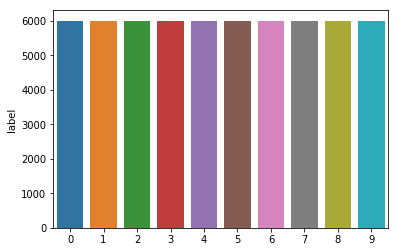

In [6]:
y=train.label.value_counts()
sns.barplot(y.index,y)

Now we can see that all of the classes has equal distribution.There are 6000 examples of each numbers in kannada in the the training dataset.Cool !

## Data preparation <a id='2'></a>

In [7]:
X_train=train.drop('label',axis=1)
Y_train=train.label

### Normalize Pixel Values

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [8]:
X_train=X_train/255
test=test/255

### Reshape

In [9]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [10]:
print('The shape of train set now is',X_train.shape)
print('The shape of test set now is',test.shape)


The shape of train set now is (60000, 28, 28, 1)
The shape of test set now is (5000, 28, 28, 1)


All Set,We have our data reshape into 60000 examples of height 28 and width 28 and 1 channel.

### Encoding Target Values

Now we will encode our target value.Keras inbuild library to_categorical() is used to do the on-hot encoding.

In [11]:
Y_train=to_categorical(Y_train)

### Splitting train and test

Now we will split out training data into train and validation data.15percent of the training data will be used for validation purpose.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.15)

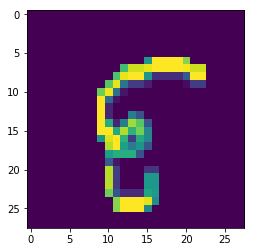

In [13]:
plt.imshow(X_train[0][:,:,0])

It's Nine in Kannada


### More data !

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.



In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


For the data augmentation, i choosed to :

   - Randomly rotate some training images by 10 degrees
   - Randomly Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

## A breif Intro to CNN <a id='3' ></a>

We will first learn about the convolution operation
**Edge Detection Example**
![](https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-12-07-15-47-38.png?resize=673%2C358&ssl=1)

So, we take the first 3 X 3 matrix from the 6 X 6 image and multiply it with the filter. Now, the first element of the 4 X 4 output will be the sum of the element-wise product of these values, i.e. 10 x 1 + 10 x 0 + 10 x -1 + 10 x 1 + 10 x 0 + 10 x -1 + 10 x 1 + 10 x 0 + 10 x -1 = 0. To calculate the second element of the 4 X 4 output, we will shift our filter one step towards the right and again get the sum of the element-wise product.
We can see that after the entire operation the new matrix seperates the edges.
### Padding
we can pad the image with an additional border, i.e., we add one pixel all around the edges. This means that the input will be an 8 X 8 matrix (instead of a 6 X 6 matrix). Applying convolution of 3 X 3 on it will result in a 6 X 6 matrix which is the original shape of the image. This is where padding comes to the fore:

    Input: n X n
    Padding: p
    Filter size: f X f
    Output: (n+2p-f+1) X (n+2p-f+1)

There are two common choices for padding:

    Valid: It means no padding. If we are using valid padding, the output will be (n-f+1) X (n-f+1)
    Same: Here, we apply padding so that the output size is the same as the input size, i.e.,
    n+2p-f+1 = n
    So, p = (f-1)/2

We now know how to use padded convolution. This way we don’t lose a lot of information and the image does not shrink either. Next, we will look at how to implement strided convolutions.

### Pooling Layers

Pooling layers are generally used to reduce the size of the inputs and hence speed up the computation. Consider a 4 X 4 matrix as shown below:
![](https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-12-10-12-50-40.png?resize=271%2C93&ssl=1)
Applying max pooling on this matrix will result in a 2 X 2 output.


### CNN Example

We’ll take things up a notch now. Let’s look at how a convolution neural network with convolutional and pooling layer works. Suppose we have an input of shape 32 X 32 X 3:

![](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-12-10-14-07-58.png?resize=767%2C200&ssl=1)

There are a combination of convolution and pooling layers at the beginning, a few fully connected layers at the end and finally a softmax classifier to classify the input into various categories. There are a lot of hyperparameters in this network which we have to specify as well.

Generally, we take the set of hyperparameters which have been used in proven research and they end up doing well. As seen in the above example, the height and width of the input shrinks as we go deeper into the network (from 32 X 32 to 5 X 5) and the number of channels increases (from 3 to 10).


### CNN

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

Here is the link to original article.
[credits](https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/)

## Modelling <a id='4' ></a>

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

**Unhide Above output to see the summary**

### Optimizer
In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

![](https://blog.algorithmia.com/wp-content/uploads/2018/05/word-image.png)

In [17]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [18]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

### Learning rate reduction

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [19]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Fitting our model <a id='5'></a>

In [20]:
epochs=5 #change this to 30 if you need to get better score
batch_size=64

In [21]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/5
 - 18s - loss: 0.2654 - accuracy: 0.9158 - val_loss: 0.0287 - val_accuracy: 0.9913
Epoch 2/5


/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 16s - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0284 - val_accuracy: 0.9933
Epoch 3/5
 - 16s - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 4/5
 - 17s - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 5/5
 - 16s - loss: 0.0411 - accuracy: 0.9882 - val_loss: 0.0196 - val_accuracy: 0.9947


## Evaluating our approach <a id='6'></a>

Text(0, 0.5, 'accuracy')

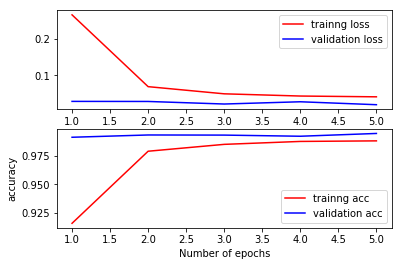

In [22]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')


We have plotted the performance of our model.We can see the number of epochs in the X axis and change in model performance in Y axis.

### Confusion matrix

Confusion matrix can be pretty usefull when evaluating  multiclass classifications.We can see which are classes are misclassified by our model clearly.

In [23]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)


In [24]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))



In [25]:
conf

,0,1,2,3,4,5,6,7,8,9
0,848,9,0,1,0,0,0,0,0,0
1,0,913,0,0,0,0,0,0,0,0
2,1,0,907,0,0,0,0,0,0,0
3,1,2,0,877,0,0,0,10,0,0
4,0,0,0,1,921,0,0,0,0,4
5,0,0,0,2,1,871,0,0,0,0
6,0,0,0,0,0,0,860,2,0,0
7,0,1,0,0,0,0,3,929,0,0
8,1,0,0,0,0,0,0,0,916,1
9,2,0,0,0,0,0,6,0,0,910


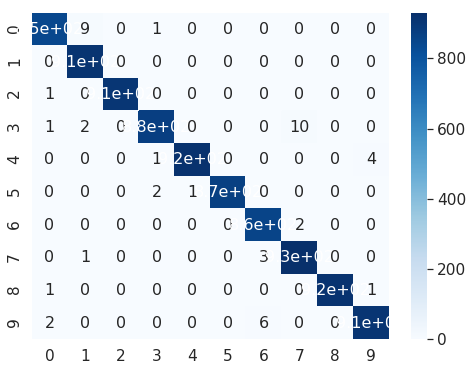

In [26]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)# font size

Here we can see that our model is doing a pretty good job in almost all digits.But it seems to have some confusions between 
- 0 and 1 : we can observe that some 0s and 1s are misclassified.
- 7 and 6 : we can observe that some 6s and 7s are misclassifies.

## Further Investigation..

We will go on to see some of the misclassified images.We will simply inspect them to understand if it was a tough one to predict or not.Let's see...

In [27]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

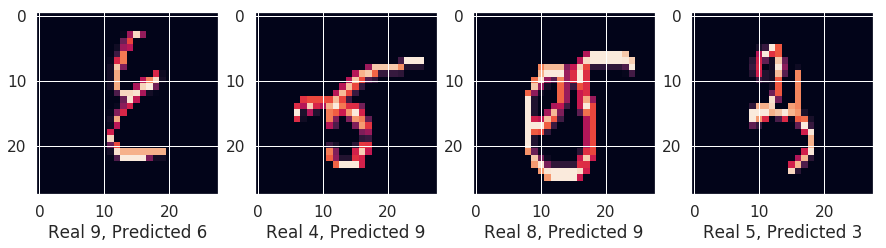

In [28]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,15))

for i in range(4):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))



hmm...Not all them,but some of them are a bit tough ones.

## Making a Submission <a id='7'></a>


In [29]:
test=pd.read_csv('../input/Kannada-MNIST/test.csv')

In [30]:
test_id=test.id

test=test.drop('id',axis=1)
test=test/255
test=test.values.reshape(-1,28,28,1)


In [31]:
test.shape

(5000, 28, 28, 1)

We will make our prediction using our CNN model.

In [32]:
y_pre=model.predict(test)     ##making prediction
y_pre=np.argmax(y_pre,axis=1) ##changing the prediction intro labels

In [33]:
sample_sub['label']=y_pre
sample_sub.to_csv('submission.csv',index=False)


In [34]:
sample_sub.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7



<html>
<body>

<p><font size="5" color="red">If you like my kernel please consider upvoting it</font></p>
<p><font size="4" color="blue">Don't hesitate to give your suggestions in the comment section</font></p>
<p><font size="3" color="green">Thank you...</font></p>


</body>
</html>